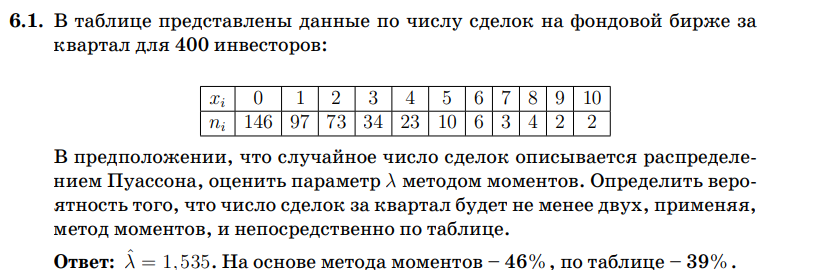

In [1]:
import numpy as np

# Данные из таблицы
x_i = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
n_i = np.array([146, 97, 73, 34, 23, 10, 6, 3, 4, 2, 2])

# Общее количество инвесторов
N = n_i.sum()

# Выборочное среднее
x_mean = (x_i * n_i).sum() / N

# Оценка параметра λ методом моментов
lambda_hat = x_mean

# Вероятность того, что число сделок за квартал будет не менее двух (метод моментов)
P_X_geq_2_moments = 1 - (np.exp(-lambda_hat) * (1 + lambda_hat))

# Вероятность того, что число сделок за квартал будет не менее двух (непосредственно по таблице)
P_X_geq_2_table = n_i[2:].sum() / N

# Вывод результатов
print(f"Оценка параметра λ: {lambda_hat:.3f}")
print(f"Вероятность P(X ≥ 2) (метод моментов): {P_X_geq_2_moments:.3f}")
print(f"Вероятность P(X ≥ 2) (по таблице): {P_X_geq_2_table:.3f}")


Оценка параметра λ: 1.535
Вероятность P(X ≥ 2) (метод моментов): 0.454
Вероятность P(X ≥ 2) (по таблице): 0.393


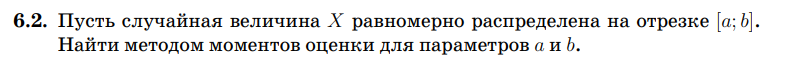

In [2]:
import numpy as np
from scipy.optimize import fsolve

# Пример данных (замените этими данными свои данные)
x_data = np.array([1, 2, 3, 4, 5])

# Выборочное среднее
x_mean = np.mean(x_data)

# Второй выборочный начальный момент
m_2 = np.mean(x_data**2)

# Функция, представляющая систему уравнений
def equations(params):
    a, b = params
    eq1 = (a + b) / 2 - x_mean
    eq2 = (a**2 + a*b + b**2) / 3 - m_2
    return [eq1, eq2]

# Решение системы уравнений
a_hat, b_hat = fsolve(equations, [0, 1])

print(f"Оценка параметра a: {a_hat}")
print(f"Оценка параметра b: {b_hat}")


Оценка параметра a: 0.5505102572168215
Оценка параметра b: 5.449489742783179


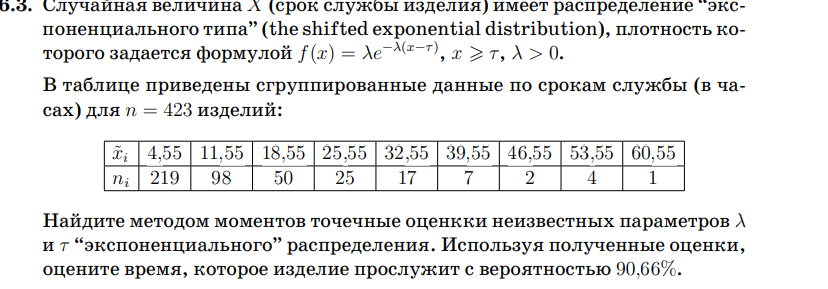

In [3]:
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt

# Данные из таблицы
x_i = np.array([4.55, 11.55, 18.55, 25.55, 32.55, 39.55, 46.55, 53.55, 60.55])
n_i = np.array([219, 98, 50, 25, 17, 7, 2, 4, 1])

# Общее количество изделий
N = n_i.sum()

# Расчет выборочной функции распределения
F_x = np.cumsum(n_i) / N

# Только значения x, для которых F(x) < 1 (для логарифмического преобразования)
mask = F_x < 1
x_filtered = x_i[mask]
F_x_filtered = F_x[mask]

# Линейная регрессия на преобразованных данных
slope, intercept, _, _, _ = linregress(x_filtered, np.log(1 - F_x_filtered))

# Оценки параметров
lambda_hat = -slope
tau_hat = -intercept / slope

print(f"Оценка параметра λ: {lambda_hat}")
print(f"Оценка параметра τ: {tau_hat}")

# Вероятность, что изделие прослужит больше x часов
p = 0.9066

# Расчет времени службы изделия с вероятностью 90,66%
x_time = tau_hat - (1 / lambda_hat) * np.log(1 - p)
print(f"Время, которое изделие прослужит с вероятностью 90,66%: {x_time} часов")


Оценка параметра λ: 0.10124166728776995
Оценка параметра τ: -1.5002599880113956
Время, которое изделие прослужит с вероятностью 90,66%: 21.917607351217434 часов
